## Linh Nguyen - ID 170037344

# SMM750 - Final coursework

## 1. Set up

In [1]:
# Set up
from pathlib import Path

paths = [
    './output/feature_distribution',
    './output/severance_offer'
]

for path in paths:
    Path(path).mkdir(parents=True, exist_ok=True)

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import warnings
from itertools import combinations
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay, accuracy_score, confusion_matrix, roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics._classification import UndefinedMetricWarning
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn import preprocessing
import warnings
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px

warnings.filterwarnings('ignore')


In [3]:
plt.style.use('ggplot')

## 2. Data Pre-processing

In [4]:
# Load data
df = pd.read_csv('./data/employee_attrition_previous_closure.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  50.0        No      Travel_Rarely     1126.0  Research & Development   
1  36.0        No      Travel_Rarely      216.0  Research & Development   
2  21.0       Yes      Travel_Rarely      337.0                   Sales   
3  50.0        No  Travel_Frequently     1246.0         Human Resources   
4  52.0        No      Travel_Rarely      994.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0          2        Medical              1             997   
1               6.0          2        Medical              1             178   
2               7.0          1      Marketing              1            1780   
3               NaN          3        Medical              1             644   
4               7.0          4  Life Sciences              1            1118   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         3            80                 1   
1  ...                         4            80                 2   
2  ...                         2            80                 0   
3  ...                         3            80                 1   
4  ...                         4            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 32                      1               2               5   
1                  7                      0               3               3   
2                  1                      3               3               1   
3                 32                      2               3              32   
4                 18                      4               3               8   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        1                     3  
1                  2                        0                     1  
2                  0                        1                     0  
3                  5                       10                     7  
4                  6                        4                     0  

[5 rows x 35 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [6]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  893.000000  1002.000000        934.000000  1029.000000         1029.0   
mean    37.930571   800.528942          9.930407     2.892128            1.0   
std      9.395978   408.109828          8.421791     1.053541            0.0   
min     18.000000   102.000000          1.000000     1.000000            1.0   
25%     31.000000   458.250000          2.000000     2.000000            1.0   
50%     37.000000   801.500000          8.000000     3.000000            1.0   
75%     44.000000  1162.000000         16.000000     4.000000            1.0   
max     60.000000  1496.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1029.000000              1029.000000  1029.000000     1029.000000   
mean      1024.367347                 2.683188    66.680272        2.713314   
std        606.301635                 1.096829    20.474094        0.710146   
min          1.000000                 1.000000    30.000000        1.000000   
25%        496.000000                 2.000000    48.000000        2.000000   
50%       1019.000000                 3.000000    67.000000        3.000000   
75%       1553.000000                 4.000000    84.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1029.000000  ...               1029.000000         1029.0   
mean      2.043732  ...                  2.689990           80.0   
std       1.118918  ...                  1.077767            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1029.000000        1029.000000            1029.000000   
mean           0.822157          11.196307               2.782313   
std            0.874662           7.857581               1.283401   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1029.000000     1029.000000         1029.000000   
mean          2.748299        6.942663            4.215743   
std           0.697278        6.068322            3.658595   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1029.000000           1029.000000  
mean                  2.119534              4.005831  
std                   3.108651              3.522574  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   2.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

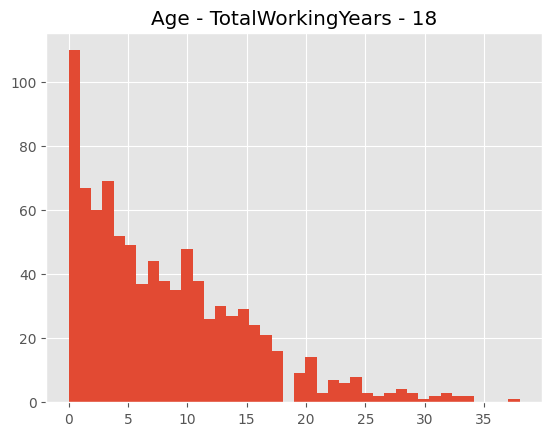

In [7]:
plt.hist(df['Age'] - df['TotalWorkingYears'] - 18, 40)
plt.title('Age - TotalWorkingYears - 18')
plt.show()

Most is 18 -> We can assume everyone starts working at 18. But first let's see if Age is an important variable. If it's important, then we impute, based on the above assumption. If not then drop

In [8]:
# Check missing values
df.isna().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [9]:
# Drop the missing rows for EDA purpose. We reduced the data from 1029 rows to 775 -> around 250 rows have been deleted.
df = df.dropna()
df.shape

(775, 35)

In [10]:
# Check duplication
dups = df.duplicated() #checks each row of the dataset and returns TRUE or FALSE depending on whether it is a duplicate
print(dups.any()) #returns TRUE if there is any value in dups that is equal to TRUE

False


In [11]:
# Check the count of values in each column
df.nunique()

Age                          39
Attrition                     2
BusinessTravel                3
DailyRate                   589
Department                    3
DistanceFromHome             27
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber              775
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               743
MonthlyRate                 766
NumCompaniesWorked           10
Over18                        1
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
WorkLifeBalance               4
YearsAtC

In [12]:
# Drop columns that have only one value and the column Employee Number
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

### Distribution of Attrition statuses

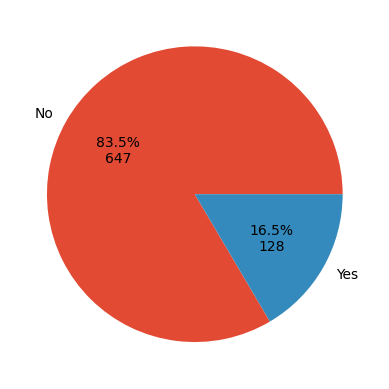

In [13]:
attrition_pct = df['Attrition'].value_counts()

total = attrition_pct.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(attrition_pct, labels=attrition_pct.index, autopct=fmt)
plt.show()

In [14]:
# Pairplot, hue = 'Attrition' 
# sns.pairplot(df, hue="Attrition")

### Features Distribution

In [15]:
for col in df.drop('Attrition', axis=1).columns:
    sns.displot(df, x=col, hue='Attrition', multiple='dodge', common_norm=False, stat='probability')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'./output/feature_distribution/{col}.png')
    plt.close()

### Data Transformation

In [16]:
# Check for variables with skew above 0.75
df = df.copy()
skew_limit = 0.75
skew_vals = df.skew()
skew_cols = (
    skew_vals
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns={0:'Skew'})
    .query('abs(Skew) > {}'.format(skew_limit))
)

display(skew_cols.style.set_caption('Columns to be log-transformed:'))

# Log-transform skewed variables
for i in skew_cols.index.values:
    df[i] = df[i].apply(np.log1p)

## 3. Correlation Matrix

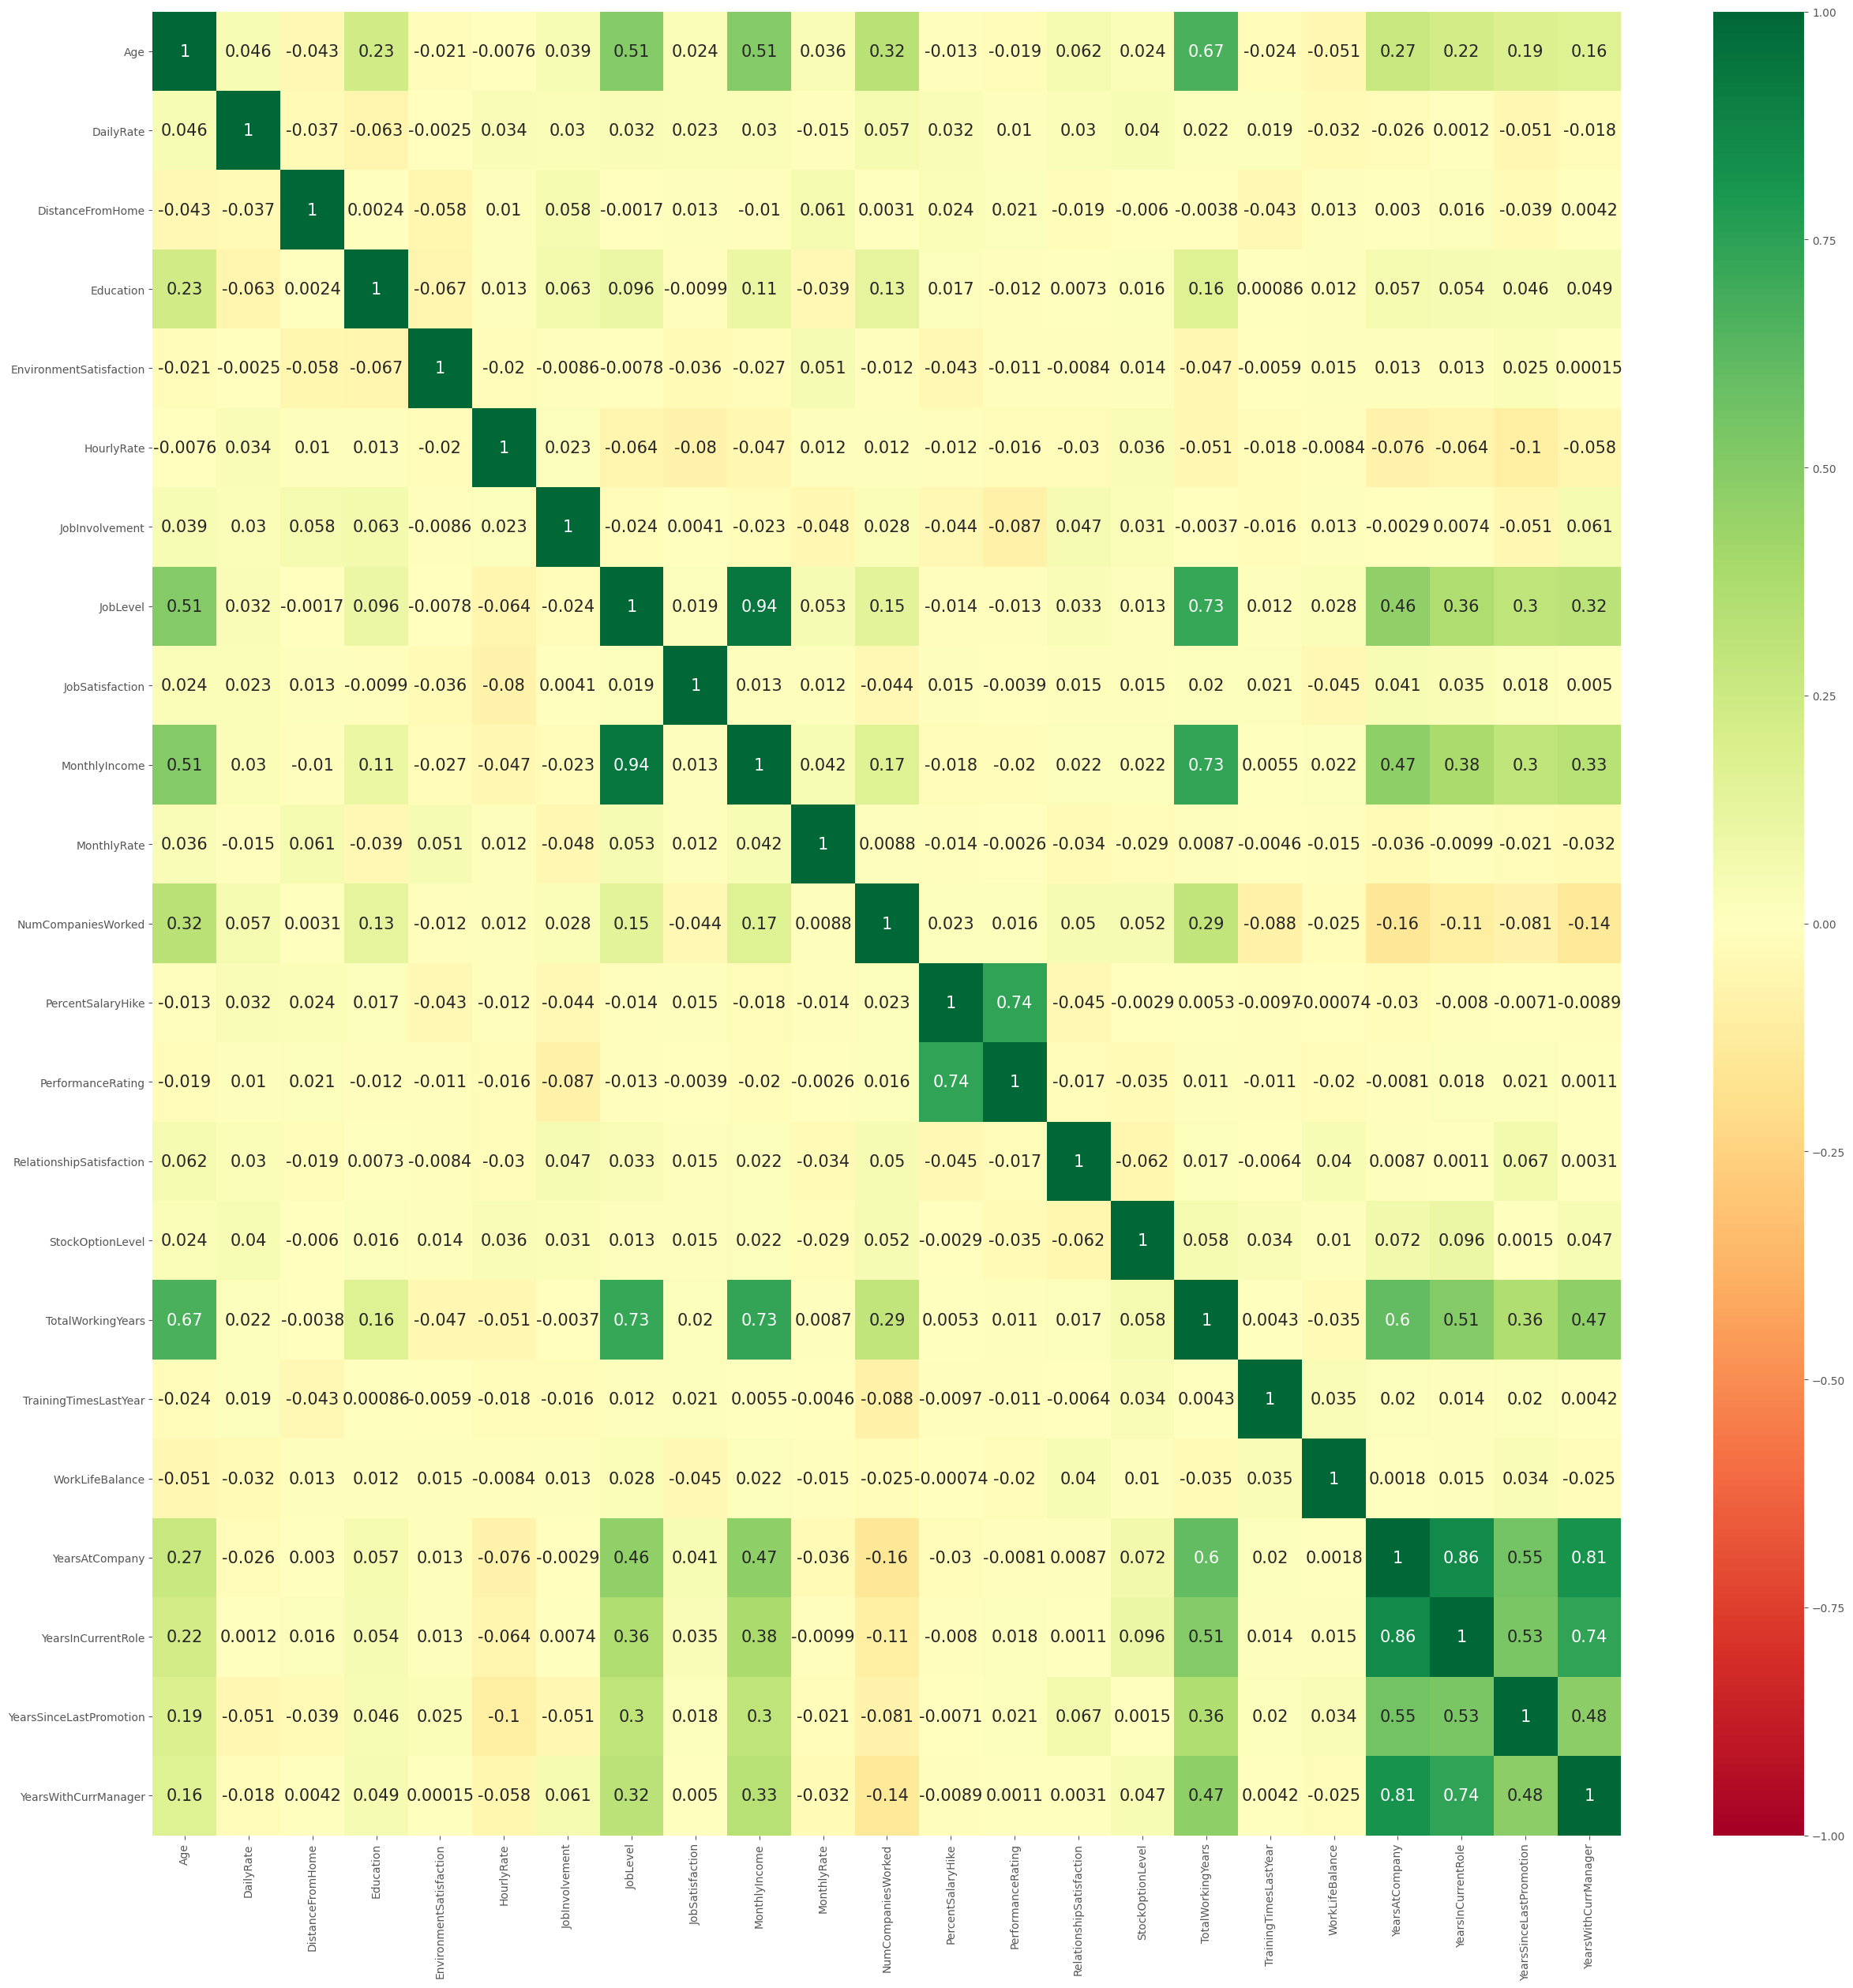

In [17]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15}, vmin=-1, vmax=1)
plt.show()

High correlations:

- Age & Total working years: 0.68
- Job level & Monthly income: 0.95
- Job level & Total Working years: 0.79
- Monthly income & Total Working years: 0.77
- Percent Salary Hike & Performance Rating: 0.77
- Total Working Years & Years at Company: 0.62
- Years at Company & Years in Current Role: 0.78
- Years at Company & Years since last Promotion: 0.59
- Years At Company & Years with Current Manager: 0.76
- Years in Current Role & Years since Last Promotion: 0.55
- Years in Current Role & Years with Current Manager: 0.71

Looking at the plot:
- Age seems to be an important variable with people leaving more at young age. Let's run a linear model and see if it's significant in predicting attrition. We'll need to impute it
- Distance from home does not seem to be predictive of Attrition, as the distribution of DistanceFromHome for both the attrition and non-attrition group is very similar -> We can drop this column
- DailyRate is missing for a very small proportion of the data and has a very weak correlation with other variables. This means we cannot reliably infer its values.

## 4. Logistic regression Model

In [18]:
# Load data
data_raw = pd.read_csv('./data/employee_attrition_previous_closure.csv')

In [19]:
# Create definitions
def encode(X, encoder):
    X = pd.concat(
        [
            X.drop(encoder.feature_names_in_, axis=1),
            pd.DataFrame(
                encoder.transform(X[encoder.feature_names_in_]),
                columns=encoder.get_feature_names_out(),
                index=X.index,
            ),
        ],
        axis=1,
    )
    return X


def scale(X, scaler):
    return pd.DataFrame(
        scaler.transform(X),
        columns=X.columns,
        index=X.index
    )

def impute(X, imputer):
    return pd.DataFrame(
        imputer.transform(X),
        columns=X.columns,
        index=X.index
    )


def preprocess(X, encoder, scaler, imputer, to_drop_cols):
    X_processed = X.drop(to_drop_cols, axis=1)
    X_processed['Age'] = X_processed['Age'].fillna(X_processed['TotalWorkingYears'] + 18)
    X_processed = encode(X_processed, encoder)
    X_processed = scale(X_processed, scaler)
    X_processed = impute(X_processed, imputer)

    return X_processed


def binarise_y(y):
    return y.map({'Yes': 1, 'No': 0})


def grid_search(model, parameters, X_train, X_test, y_train, y_test):
    # Find the best combination of model parameters using cross validation
    clf = GridSearchCV(
        model,
        parameters,
        cv=3,
        scoring=['neg_log_loss', 'roc_auc', 'accuracy'],
        refit='roc_auc',
    )

    clf = clf.fit(X_train, y_train)

    print('best_params: ', clf.best_params_)

    # Evaluate the model's metrics
    print('--CROSS VALIDATION--')
    print('roc_auc:', np.round(clf.cv_results_['mean_test_roc_auc'][clf.best_index_], 3))
    print('accuracy:', np.round(clf.cv_results_['mean_test_accuracy'][clf.best_index_], 3))

    print('--TEST--')
    y_pred_test = clf.predict(X_test)
    y_pred_test_prob = clf.predict_proba(X_test)[:, 1]
    print('roc_auc:', np.round(roc_auc_score(y_test, y_pred_test_prob), 3))
    print('accuracy:', np.round(accuracy_score(y_test, y_pred_test), 3))

    return clf

In [20]:
# preprocess data
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
to_drop_cols = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18', 'DistanceFromHome']

# Work on a copy
data = data_raw.copy()
data['Age'] = data['Age'].fillna(data['TotalWorkingYears'] + 18)

# Features and labels
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(X_train[cat_cols])
X_train = encode(X_train, encoder)

# Drop redundant columns
X_train = X_train.drop(to_drop_cols, axis=1)

# Scale data
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scale(X_train, scaler)

# Impute missing values
imputer = KNNImputer(n_neighbors=5)
imputer = imputer.fit(X_train)
X_train = impute(X_train, imputer)

y_train = binarise_y(y_train)

X_test = preprocess(X_test, encoder, scaler, imputer, to_drop_cols)
y_test = binarise_y(y_test)


### Drop high VIF columns

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = preprocess(X.copy(), encoder, scaler, imputer, to_drop_cols)

# Checking VIF
def check_vif(X):
    vif = pd.Series(
        [
            variance_inflation_factor(X, i)
            for i in range(X.shape[1])
        ],
        index=X.columns,
    ).sort_values()

    print('All VIF < 5: ', all(vif < 5))

    return vif

check_vif(X_vif)


All VIF < 5:  False


RelationshipSatisfaction              1.031408
JobSatisfaction                       1.034034
MonthlyRate                           1.039051
HourlyRate                            1.039581
EnvironmentSatisfaction               1.043575
OverTime_Yes                          1.047195
WorkLifeBalance                       1.047206
JobInvolvement                        1.052176
DailyRate                             1.052416
Gender_Male                           1.054055
TrainingTimesLastYear                 1.056093
BusinessTravel_nan                    1.071030
MaritalStatus_nan                     1.072575
Education                             1.107728
NumCompaniesWorked                    1.300910
YearsSinceLastPromotion               1.662619
MaritalStatus_Married                 1.882114
StockOptionLevel                      1.889985
JobRole_Manufacturing Director        1.941480
Age                                   2.189732
BusinessTravel_Travel_Frequently      2.492929
BusinessTrave

In [22]:
high_vif_cols = ['Department_Research & Development', 'EducationField_Life Sciences', 'MonthlyIncome', 'Department_Sales', 'JobLevel']
check_vif(X_vif.drop(high_vif_cols, axis=1))

All VIF < 5:  True


HourlyRate                          1.028566
RelationshipSatisfaction            1.028960
JobSatisfaction                     1.031974
MonthlyRate                         1.035939
EnvironmentSatisfaction             1.041145
WorkLifeBalance                     1.042039
OverTime_Yes                        1.044373
JobInvolvement                      1.046038
DailyRate                           1.050786
Gender_Male                         1.050947
TrainingTimesLastYear               1.055209
MaritalStatus_nan                   1.058272
BusinessTravel_nan                  1.070013
Education                           1.103299
EducationField_Other                1.120687
EducationField_Technical Degree     1.122617
EducationField_Medical              1.227022
NumCompaniesWorked                  1.292815
JobRole_Human Resources             1.404068
EducationField_Marketing            1.502192
YearsSinceLastPromotion             1.642456
JobRole_Research Director           1.728806
MaritalSta

In [23]:
# Drop the high VIF columns from X_train
X_train = X_train.drop(high_vif_cols, axis=1)
X_test = X_test.drop(high_vif_cols, axis=1)

### Most important factors in predicting attrition

In [24]:
## Significance
import statsmodels.api as sm
model = sm.Logit(y_train, X_train).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.601750
         Iterations 5


In [25]:
# Print model's result
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  823
Model:                          Logit   Df Residuals:                      783
Method:                           MLE   Df Model:                           39
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                 -0.3139
Time:                        15:56:31   Log-Likelihood:                -495.24
converged:                       True   LL-Null:                       -376.92
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.1142      0.115     -0.992      0.321      -0.340       0.111
DailyRate                           -0.0053      0.080     -0.067

In [26]:
logit_sum = model.conf_int()
logit_sum['pvalues'] = model.pvalues
logit_sum['coeff'] = model.params
logit_sum.rename(columns={0: '2.5th percentile', 1: '97.5th percentile'}, inplace=True)
significant_var = logit_sum.query('pvalues < 0.05').sort_values('coeff')
significant_var = significant_var.reset_index()
significant_var

index  2.5th percentile  97.5th percentile  \
0                YearsInCurrentRole         -0.532422          -0.019794   
1           EnvironmentSatisfaction         -0.419114          -0.104965   
2                    JobInvolvement         -0.331314          -0.017418   
3                   JobSatisfaction         -0.329110          -0.018723   
4                NumCompaniesWorked          0.128753           0.474069   
5  BusinessTravel_Travel_Frequently          0.074952           0.550594   
6     JobRole_Laboratory Technician          0.066104           0.562563   
7      JobRole_Sales Representative          0.142306           0.581269   
8              MaritalStatus_Single          0.163568           0.691776   
9                      OverTime_Yes          0.347265           0.665017   

        pvalues     coeff  
0  3.474443e-02 -0.276108  
1  1.076597e-03 -0.262040  
2  2.944488e-02 -0.174366  
3  2.806172e-02 -0.173917  
4  6.226938e-04  0.301411  
5  9.946865e-03  0.312773  
6  1.306809e-02  0.314334  
7  1.234641e-03  0.361788  
8  1.504396e-03  0.427672  
9  4.265849e-10  0.506141

In [27]:
significant_vars = significant_var['index'].tolist()

### Predict attrition

In [28]:
model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
)

parameters = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'class_weight': ['balanced', None]
}

clf = grid_search(model, parameters, X_train, X_test, y_train, y_test)

best_params:  {'C': 1, 'class_weight': None}
--CROSS VALIDATION--
roc_auc: 0.819
accuracy: 0.861
--TEST--
roc_auc: 0.844
accuracy: 0.883


In [29]:
# Model coefficients
model_coefficients = pd.DataFrame(clf.best_estimator_.coef_, columns=X_train.columns).T.reset_index()
model_coefficients.columns = ['variable', 'coefficient']
m = model_coefficients.sort_values(by='coefficient')
(
    m
    .merge(logit_sum.reset_index()[['index', 'pvalues']], left_on='variable', right_on='index')
    .drop('index', axis=1)
    .eval('significance0_05 = pvalues < 0.05')
    .eval('significance0_1 = pvalues < 0.1')
)

variable  coefficient       pvalues  \
0                 YearsInCurrentRole    -0.785636  3.474443e-02   
1                  TotalWorkingYears    -0.746297  1.104522e-01   
2            EnvironmentSatisfaction    -0.517244  1.076597e-03   
3                    JobSatisfaction    -0.337484  2.806172e-02   
4          JobRole_Research Director    -0.305332  8.681685e-01   
5                     JobInvolvement    -0.300466  2.944488e-02   
6                    WorkLifeBalance    -0.282274  1.170754e-01   
7           RelationshipSatisfaction    -0.171509  2.025019e-01   
8              TrainingTimesLastYear    -0.170028  4.008277e-01   
9                                Age    -0.166229  3.213327e-01   
10              YearsWithCurrManager    -0.116286  6.747682e-01   
11                         DailyRate    -0.053679  9.467494e-01   
12                 PerformanceRating    -0.045922  6.788297e-01   
13                  StockOptionLevel     0.000000  7.735322e-01   
14                        HourlyRate     0.000000  9.407418e-01   
15                BusinessTravel_nan     0.000000  8.442767e-01   
16            EducationField_Medical     0.003728  9.878254e-01   
17                 PercentSalaryHike     0.021591  6.437889e-01   
18    JobRole_Manufacturing Director     0.040734  3.727846e-01   
19              EducationField_Other     0.054506  8.425880e-01   
20                 MaritalStatus_nan     0.063291  4.137479e-01   
21                         Education     0.093533  6.217571e-01   
22          EducationField_Marketing     0.094836  4.964765e-01   
23                   JobRole_Manager     0.145282  1.662212e-01   
24                       Gender_Male     0.155693  2.331252e-01   
25             MaritalStatus_Married     0.174790  6.115545e-01   
26        JobRole_Research Scientist     0.175172  2.138609e-01   
27                       MonthlyRate     0.199894  3.831846e-01   
28   EducationField_Technical Degree     0.255485  6.626111e-02   
29           JobRole_Human Resources     0.265379  5.557319e-02   
30           YearsSinceLastPromotion     0.325964  1.882150e-01   
31           JobRole_Sales Executive     0.379240  5.749453e-02   
32      JobRole_Sales Representative     0.446597  1.234641e-03   
33     JobRole_Laboratory Technician     0.497722  1.306809e-02   
34      BusinessTravel_Travel_Rarely     0.527765  9.370218e-02   
35                NumCompaniesWorked     0.587655  6.226938e-04   
36  BusinessTravel_Travel_Frequently     0.712675  9.946865e-03   
37              MaritalStatus_Single     0.744943  1.504396e-03   
38                    YearsAtCompany     0.860295  5.953886e-02   
39                      OverTime_Yes     0.917915  4.265849e-10   

    significance0_05  significance0_1  
0               True             True  
1              False            False  
2               True             True  
3               True             True  
4              False            False  
5               True             True  
6              False            False  
7              False            False  
8              False            False  
9              False            False  
10             False            False  
11             False            False  
12             False            False  
13             False            False  
14             False            False  
15             False            False  
16             False            False  
17             False            False  
18             False            False  
19             False            False  
20             False            False  
21             False            False  
22             False            False  
23             False            False  
24             False            False  
25             False            False  
26             False            False  
27             False            False  
28             False             True  
29             False             True  
30             False            False  


In [30]:
# retrain the model using the best parameters found from grid search
best_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    **clf.best_params_
).fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
y_pred_test_prob = best_model.predict_proba(X_test)[:, 1]

roc_auc: 0.844
accuracy: 0.883


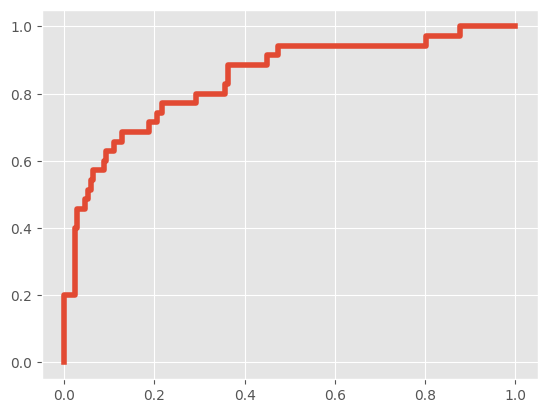

In [31]:
# Evaluate
print('roc_auc:', np.round(roc_auc_score(y_test, y_pred_test_prob), 3))
print('accuracy:', np.round(accuracy_score(y_test, y_pred_test), 3))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

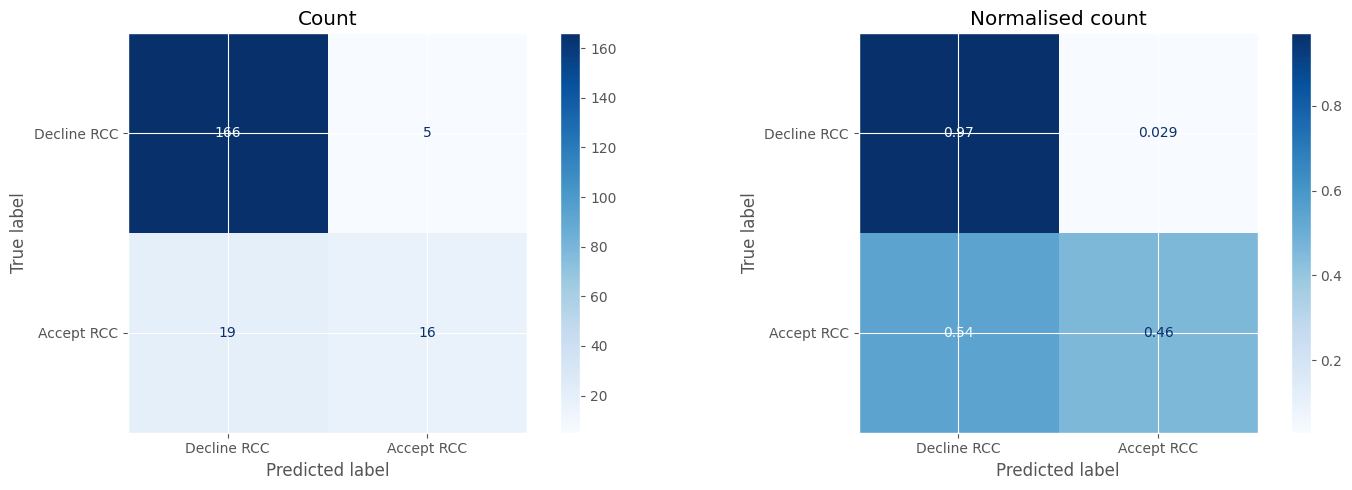

In [32]:
# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_test, y_pred_test, normalize=None, ax=axs[0], display_labels=['Decline RCC', 'Accept RCC'], cmap='Blues')
axs[0].set_title('Count')
disp.from_predictions(y_test, y_pred_test, normalize='true', ax=axs[1], display_labels=['Decline RCC', 'Accept RCC'], cmap='Blues')
axs[1].set_title('Normalised count')
plt.tight_layout()
plt.show()

In [33]:
# Final model - Trained with the whole dataset
X_final = pd.concat([X_train, X_test], ignore_index=True)
y_final = pd.concat([y_train, y_test], ignore_index=True)

final_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    **clf.best_params_
).fit(X_final, y_final)

In [34]:
# predict RCC
to_predict = pd.read_csv('./data/employee_attrition_lyon.csv')

X_to_predict = preprocess(to_predict, encoder, scaler, imputer, to_drop_cols)
X_to_predict = X_to_predict.drop(high_vif_cols, axis=1)
to_predict['RCC_acceptance'] = final_model.predict_proba(X_to_predict)[:, 1]

to_predict.to_csv('./output/lyon_acceptance.csv', index=False)


## 5. Optimisation model

In [35]:
!pip install pulp

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpProblem, LpStatus, LpVariable, lpSum

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [37]:
data_raw = pd.read_csv('./data/employee_attrition_lyon_probs.csv')

## Severance package

In [38]:
data_raw['eligible_for_1/4_monthly_income'] = data_raw['YearsAtCompany'].where(data_raw['YearsAtCompany'] < 10, 10)
data_raw['eligible_for_1/3_monthly_income'] = data_raw['YearsAtCompany'] - data_raw['eligible_for_1/4_monthly_income']

# We need to use the monthly income instead of monthly rate because according to Maurice's email, the RCC
# needs to be based on the monthly salary, which is defined as 1/12 of the total amount OBTAINED over the
# past year --> Needs to be the actual income.
data_raw['severance_package'] =\
    data_raw['MonthlyIncome'] / 4 * data_raw['eligible_for_1/4_monthly_income'] +\
    data_raw['MonthlyIncome'] / 3 * data_raw['eligible_for_1/3_monthly_income'] +\
    data_raw['MonthlyIncome'] * 3

## Divide employees into groups

In [39]:
data = data_raw.copy()

In [40]:
# By monthly income
category_name = 'MonthlyIncome'
n_buckets = 20
data[f'{category_name}_category'] = pd.qcut(data[category_name], n_buckets)
data[f'{category_name}_category_code'] = data[f'{category_name}_category'].cat.codes
data.groupby(f'{category_name}_category_code').size()

MonthlyIncome_category_code
0     24
1     21
2     22
3     22
4     22
5     22
6     22
7     22
8     22
9     22
10    22
11    22
12    22
13    22
14    22
15    22
16    22
17    22
18    22
19    22
dtype: int64

In [41]:
category_cols = [col for col in data.columns if '_category_code' in col]
category_cols

['MonthlyIncome_category_code']

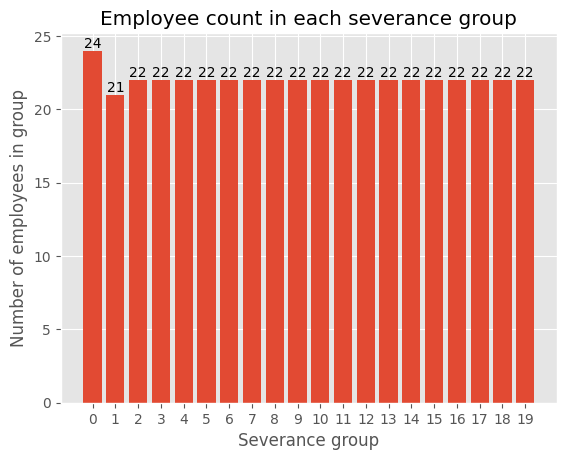

In [42]:
# Final grouping
# Make sure there's no NA
data['group_combined'] = data[category_cols].astype(str).agg('_'.join, axis=1)
assert not data.query(f'{category_name}_category_code < 0').shape[0]

data['severance_group'] = data['group_combined'].astype('category').cat.codes

severance_group_size = data.groupby('severance_group').size()

ax = plt.bar(severance_group_size.index, severance_group_size)
plt.xticks(severance_group_size.index)
plt.xlabel('Severance group')
plt.ylabel('Number of employees in group')
plt.title('Employee count in each severance group')
plt.bar_label(ax)

# Make sure there's enough employee in each category
min_employees = 5
assert (severance_group_size > min_employees).all()

## Calculate metrics for constraints

In [43]:
# region Constraint 1: Min number to offer RCC: 40.
# This is based on the probability so no need to do anything here
# endregion

# region Constraint 2: Yearly saving from salary is > 3million
# we calculate the yearly rate from monthly rate. We can't use monthly income because
# that's what the employee receives, but we are actually interested in what the company
# has to pay out
data['YearlyRate'] = data['MonthlyRate'] * 12 * data['prob_take_rcc']
# endregion

# region Constraint 3: Leaving ppl are spread evenly across job roles.
data['JobRole'] = 'role_' + data['JobRole']
role_list = data['JobRole'].unique().tolist()
role_counts = data.groupby('JobRole').size()

# Transform to wide format
data = pd.concat(
    [
        data.drop(['JobRole'], axis=1),
        data[['JobRole', 'prob_take_rcc']].pivot(columns='JobRole', values='prob_take_rcc').fillna(0),
    ],
    axis=1,
)
# endregion

# region Constraint 4: >= 80% of the employees have to stay in each department
data['Department'] = 'dept_' + data['Department']
dept_list = data['Department'].unique().tolist()
dept_counts = data.groupby('Department').size()

# Transform to wide format
data = pd.concat(
    [
        data.drop(['Department'], axis=1),
        data[['Department', 'prob_take_rcc']].pivot(columns='Department', values='prob_take_rcc').fillna(0),
    ],
    axis=1,
)
# endregion

# endregion

# region Compute the statistics for each employee category
data['employee_count'] = 1
severance_group_stats = data.groupby('severance_group', as_index=False).agg({
    'prob_take_rcc': 'sum',  # constraint 1
    'YearlyRate': 'sum',  # constraint 2
    **{role: 'sum' for role in role_list},  # constraint 3
    **{dept: 'sum' for dept in dept_list},  # constraint 4
    'severance_package': 'sum',  # objective
    'employee_count': 'sum',  # total number of employees in each group
})

severance_group_stats.to_csv('./output/severance_groups.csv', index=False)
# endregion

## Optimisation

In [44]:
def analyse_rcc_offer_rate(data, attribute_name):
    rcc_offer_by_attribute = (
        data
        .groupby(['rcc_offer', attribute_name], as_index=False).size()
        .pivot(index=attribute_name, columns='rcc_offer', values='size')
    )
    rcc_offer_by_attribute.columns = ['rcc_offered' if x == 1 else 'no_rcc_offered' for x in rcc_offer_by_attribute.columns]
    rcc_offer_by_attribute.reset_index()
    rcc_offer_by_attribute = rcc_offer_by_attribute.eval('pct_rcc_offered = rcc_offered / (rcc_offered + no_rcc_offered) * 100')

    print('\n')
    print(f'RCC offer by {attribute_name}')
    print(rcc_offer_by_attribute)

    return rcc_offer_by_attribute

### Case 1: Only constraint 1 and 2

In [45]:
# region Optimise
# region Setup
groups = severance_group_stats.copy()
model = LpProblem(name='test', sense=LpMinimize)

group_chosen = [LpVariable(name=f'severance_group{i}', cat='Binary') for i in groups['severance_group']]

severance_pays = groups['severance_package'].tolist()
total_employees_before = groups['employee_count'].sum()
# endregion

# region objective
objective = lpSum(
    [group * severance_package]
    for group, severance_package
    in zip(group_chosen, groups['severance_package'])
)

model += objective
# endregion

# region Constraint 1: Min number to offer RCC: 40.
employees_to_leave = lpSum([
    group * employee_count
    for group, employee_count
    in zip(group_chosen, groups['prob_take_rcc'])
])

employee_constraint = employees_to_leave >= 40

model += (employee_constraint, 'employee_to_offer_rcc')
# endregion

# region Constraint 2: Yearly saving from salary is >3 million
salary_constraint = lpSum([
    group * group_yearly_salary
    for group, group_yearly_salary
    in zip(group_chosen, groups['YearlyRate'])
]) >= 3_000_000

model += (salary_constraint, 'yearly_saving')
# endregion


In [46]:
# show model
# print(model)

# Solve
status = model.solve()

# Get status
print('Solver status:', LpStatus[model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/6aff49d5ad8f4dceaaed12159e728851-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/6aff49d5ad8f4dceaaed12159e728851-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 108 RHS
At line 111 BOUNDS
At line 132 ENDATA
Problem MODEL has 2 rows, 20 columns and 40 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2.77538e+06 - 0.00 seconds
Cgl0004I processed model has 2 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.473607
Cbc0038I Pass   1: suminf.    0.41198 (1) obj. 3.22788e+06 iterations 2
Cbc0038I Solution fou

In [47]:
# region gather optimisation results
severance_group_results = []
for var in model.variables():
    severance_group_results.append({
        'severance_group': int(var.name.replace('severance_group', '')),
        'rcc_offer': var.value()
    })
severance_group_results_df = pd.DataFrame(severance_group_results)

groups_results = pd.merge(
    groups,
    severance_group_results_df,
    on='severance_group'
)

rcc_offer_groups = groups_results.query('rcc_offer == 1')

data.merge(
    severance_group_results_df,
    on='severance_group'
).to_csv('./output/severance_offer/incomplete_case.csv', index=False)

# endregion

groups_results


severance_group  prob_take_rcc    YearlyRate  role_Sales Executive  role_Manufacturing Director  role_Human Resources  role_Research Scientist  role_Laboratory Technician  role_Sales Representative  role_Healthcare Representative  role_Manager  role_Research Director  dept_Sales  dept_Research & Development  dept_Human Resources  severance_package  employee_count  rcc_offer
0                 0       5.675262  9.930374e+05              0.000000                     0.000000              1.254420                 1.614097                    2.740774                   0.065972                        0.000000      0.000000                0.000000    0.065972                     4.354871              1.254420       1.688560e+05              24        1.0
1                 1       4.029971  6.496417e+05              0.000000                     0.000000              0.000000                 1.350682                    1.490898                   1.188392                        0.000000      0.000000                0.000000    1.188392                     2.841579              0.000000       1.920711e+05              21        1.0
2                 2       3.223162  6.129052e+05              2.425987                     0.139842              0.000000                 0.162325                    0.363875                   0.000000                        0.131133      0.000000                0.000000    2.425987                     0.797175              0.000000       5.810760e+05              22        0.0
3                 3       4.839925  1.097653e+06              2.507472                     1.289114              0.108838                 0.052081                    0.741989                   0.000000                        0.140432      0.000000                0.000000    2.507472                     2.223615              0.108838       6.371836e+05              22        1.0
4                 4       1.492655  2.369638e+05              1.035356                     0.110260              0.101656                 0.000000                    0.042508                   0.000000                        0.202875      0.000000                0.000000    1.035356                     0.355643              0.101656       6.717921e+05              22        0.0
5                 5       1.277356  2.271702e+05              0.835002                     0.252047              0.000000                 0.000000                    0.110412                   0.000000                        0.079896      0.000000                0.000000    0.835002                     0.442354              0.000000       6.534002e+05              22        0.0
6                 6       3.297585  5.349687e+05              1.918538                     0.995986              0.224158                 0.000000                    0.085660                   0.000000                        0.073243      0.000000                0.000000    1.918538                     1.154889              0.224158       8.795826e+05              22        0.0
7                 7       2.968001  5.052500e+05              2.551810                     0.274139              0.000000                 0.000000                    0.000000                   0.000000                        0.142053      0.000000                0.000000    2.551810                     0.416191              0.000000       9.896183e+05              22        0.0
8                 8       2.926451  4.274920e+05              1.955369                     0.398863              0.038805                 0.004300                    0.000000                   0.000000                        0.529115      0.000000                0.000000    1.955369                     0.932277              0.038805       1.306134e+06              22        0.0
9                 9       3.270749  8.033660e+05              2.002823                     0.027739              0.000000                 0.000000                    0.000000                   0

In [48]:
# region analyse optimisation results
# Objective: severance pay
severance_pay = rcc_offer_groups['severance_package'].sum() / 1000000
print(f'Severance pay: €{severance_pay:.2f} million')

# Constraint 1: Number of people to offer RCC
leavings = rcc_offer_groups['prob_take_rcc'].sum()
print(f'Number of employees leaving: {leavings:.2f}')

assert leavings >= 40

# Constraint 2: Yearly saving
yearly_saving = rcc_offer_groups['YearlyRate'].sum() / 1000000
print(f'Yearly saving: €{yearly_saving:.2f} million')

assert yearly_saving > 3

# analyse protected attributes
data_protected = pd.merge(
    data,
    severance_group_results_df,
    on='severance_group'
)

# Gender
_ = analyse_rcc_offer_rate(data_protected, 'Gender')

# Age
data_protected['age_group'] = pd.qcut(data_protected['Age'], 5)
_ = analyse_rcc_offer_rate(data_protected, 'age_group')

# Marital Status
_ = analyse_rcc_offer_rate(data_protected, 'MaritalStatus')


Severance pay: €2.99 million
Number of employees leaving: 41.15
Yearly saving: €7.30 million


RCC offer by Gender
        no_rcc_offered  rcc_offered  pct_rcc_offered
Gender                                              
Female             100           76        43.181818
Male               142          123        46.415094


RCC offer by age_group
                no_rcc_offered  rcc_offered  pct_rcc_offered
age_group                                                   
(17.999, 31.0]              37           58        61.052632
(31.0, 34.0]                33           31        48.437500
(34.0, 39.0]                46           30        39.473684
(39.0, 46.0]                53           30        36.144578
(46.0, 60.0]                53           15        22.058824


RCC offer by MaritalStatus
               no_rcc_offered  rcc_offered  pct_rcc_offered
MaritalStatus                                              
Divorced                   55           40        42.105263
Married     

### Case 2: Constraint 3 and 4 added

In [49]:
# region Optimise
# region Setup
groups = severance_group_stats.copy()
model = LpProblem(name='test', sense=LpMinimize)

group_chosen = [LpVariable(name=f'severance_group{i}', cat='Binary') for i in groups['severance_group']]

severance_pays = groups['severance_package'].tolist()
total_employees_before = groups['employee_count'].sum()
# endregion

# region objective
objective = lpSum(
    [group * severance_package]
    for group, severance_package
    in zip(group_chosen, groups['severance_package'])
)

model += objective
# endregion

# region Constraint 1: Min number to offer RCC: 40.
employees_to_leave = lpSum([
    group * employee_count
    for group, employee_count
    in zip(group_chosen, groups['prob_take_rcc'])
])

employee_constraint = employees_to_leave >= 40

model += (employee_constraint, 'employee_to_offer_rcc')
# endregion

# region Constraint 2: Yearly saving from salary is >3 million
salary_constraint = lpSum([
    group * group_yearly_salary
    for group, group_yearly_salary
    in zip(group_chosen, groups['YearlyRate'])
]) >= 3_000_000

model += (salary_constraint, 'yearly_saving')
# endregion

# region Constraint 3: Leaving ppl are spread evenly across job roles.
tolerance = 0.1
roles = role_counts.index

total_employees_after = total_employees_before - employees_to_leave

for role in roles:
    # Number of employees in the current role before the RCC
    count_employee_in_role_before = role_counts[role]

    # Pct of employees from the current role before the RCC
    pct_in_role_before = count_employee_in_role_before / total_employees_before

    # Number of employees remaining in the current role after the RCC
    count_employee_in_role_after = count_employee_in_role_before - lpSum([
        group * count_employees_with_role_in_group
        for group, count_employees_with_role_in_group
        in zip(group_chosen, groups[role])
    ])

    # Target number of employees remaining in the current role after the RCC
    target_count_employee_in_role_after = pct_in_role_before * total_employees_after

    # Add constraint
    model += (
        count_employee_in_role_after >= (target_count_employee_in_role_after * (1 - tolerance)),
        f'min_remaining_{role}'
    )

    model += (
        count_employee_in_role_after <= (target_count_employee_in_role_after * (1 + tolerance)),
        f'max_remaining_{role}'
    )
# endregion

# region Constraint 4: >= 80% of the employees have to stay in each department
depts = dept_counts.index

for dept in depts:
    # Number of employees in the department before
    count_employee_in_department_before = dept_counts[dept]

    total_employee_in_dept_after = count_employee_in_department_before - lpSum([
        group * count_employees_in_department_in_group
        for group, count_employees_in_department_in_group
        in zip(group_chosen, groups[dept])
    ])

    model += (
        total_employee_in_dept_after >= (count_employee_in_department_before * 0.8),
        f'remaining_{dept}'
    )
# endregion

In [50]:
# show model
# print(model)

# Solve
status = model.solve()

# Get status
print('Solver status:', LpStatus[model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/5d619c8e8bb743ca814cd0ecb811639c-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/5d619c8e8bb743ca814cd0ecb811639c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 28 COLUMNS
At line 541 RHS
At line 565 BOUNDS
At line 586 ENDATA
Problem MODEL has 23 rows, 20 columns and 452 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.32627e+06 - 0.00 seconds
Cgl0004I processed model has 11 rows, 20 columns (20 integer (20 of which binary)) and 220 elements
Cbc0038I Initial state - 3 integers unsatisfied sum - 0.351991
Cbc0038I Solution found of 3.36878e+06
Cbc0038I Before mini branch and bound, 17 integer

In [51]:
# region gather optimisation results
severance_group_results = []
for var in model.variables():
    severance_group_results.append({
        'severance_group': int(var.name.replace('severance_group', '')),
        'rcc_offer': var.value()
    })
severance_group_results_df = pd.DataFrame(severance_group_results)

groups_results = pd.merge(
    groups,
    severance_group_results_df,
    on='severance_group'
)

rcc_offer_groups = groups_results.query('rcc_offer == 1')

data.merge(
    severance_group_results_df,
    on='severance_group'
).to_csv('./output/severance_offer/complete_case_income.csv', index=False)

# endregion

groups_results


severance_group  prob_take_rcc    YearlyRate  role_Sales Executive  role_Manufacturing Director  role_Human Resources  role_Research Scientist  role_Laboratory Technician  role_Sales Representative  role_Healthcare Representative  role_Manager  role_Research Director  dept_Sales  dept_Research & Development  dept_Human Resources  severance_package  employee_count  rcc_offer
0                 0       5.675262  9.930374e+05              0.000000                     0.000000              1.254420                 1.614097                    2.740774                   0.065972                        0.000000      0.000000                0.000000    0.065972                     4.354871              1.254420       1.688560e+05              24        1.0
1                 1       4.029971  6.496417e+05              0.000000                     0.000000              0.000000                 1.350682                    1.490898                   1.188392                        0.000000      0.000000                0.000000    1.188392                     2.841579              0.000000       1.920711e+05              21        1.0
2                 2       3.223162  6.129052e+05              2.425987                     0.139842              0.000000                 0.162325                    0.363875                   0.000000                        0.131133      0.000000                0.000000    2.425987                     0.797175              0.000000       5.810760e+05              22        1.0
3                 3       4.839925  1.097653e+06              2.507472                     1.289114              0.108838                 0.052081                    0.741989                   0.000000                        0.140432      0.000000                0.000000    2.507472                     2.223615              0.108838       6.371836e+05              22        1.0
4                 4       1.492655  2.369638e+05              1.035356                     0.110260              0.101656                 0.000000                    0.042508                   0.000000                        0.202875      0.000000                0.000000    1.035356                     0.355643              0.101656       6.717921e+05              22        0.0
5                 5       1.277356  2.271702e+05              0.835002                     0.252047              0.000000                 0.000000                    0.110412                   0.000000                        0.079896      0.000000                0.000000    0.835002                     0.442354              0.000000       6.534002e+05              22        0.0
6                 6       3.297585  5.349687e+05              1.918538                     0.995986              0.224158                 0.000000                    0.085660                   0.000000                        0.073243      0.000000                0.000000    1.918538                     1.154889              0.224158       8.795826e+05              22        0.0
7                 7       2.968001  5.052500e+05              2.551810                     0.274139              0.000000                 0.000000                    0.000000                   0.000000                        0.142053      0.000000                0.000000    2.551810                     0.416191              0.000000       9.896183e+05              22        0.0
8                 8       2.926451  4.274920e+05              1.955369                     0.398863              0.038805                 0.004300                    0.000000                   0.000000                        0.529115      0.000000                0.000000    1.955369                     0.932277              0.038805       1.306134e+06              22        0.0
9                 9       3.270749  8.033660e+05              2.002823                     0.027739              0.000000                 0.000000                    0.000000                   0

In [52]:
# region analyse optimisation results
# Objective: severance pay
severance_pay = rcc_offer_groups['severance_package'].sum() / 1000000
print(f'Severance pay: €{severance_pay:.2f} million')

# Constraint 1: Number of people to offer RCC
leavings = rcc_offer_groups['prob_take_rcc'].sum()
print(f'Number of employees leaving: {leavings:.2f}')

assert leavings >= 40

# Constraint 2: Yearly saving
yearly_saving = rcc_offer_groups['YearlyRate'].sum() / 1000000
print(f'Yearly saving: €{yearly_saving:.2f} million')

assert yearly_saving > 3

# Constraint 3: Leaving ppl are spread evenly across job roles
total_headcount_after = total_employees_before - leavings

role_changes = pd.concat(
    [
        role_counts / total_employees_before * 100,  # before
        (role_counts - rcc_offer_groups[roles].sum()) / total_headcount_after * 100,  # after
    ],
    axis=1
)
role_changes.columns = ['pct_before', 'pct_after']
role_changes = role_changes.eval('relative_change = (pct_after - pct_before) / pct_before * 100').reset_index()
role_changes['JobRole'] = role_changes['JobRole'].str.replace('role_', '')

print('\n')
print('----------- Role changes')
print(role_changes)

assert (role_changes['relative_change'].abs() <= tolerance * 100).all()

# Constraint 4: >= 80% of the employees have to stay in each department
dept_changes = pd.concat(
    [
        dept_counts,  # before
        dept_counts - rcc_offer_groups[depts].sum(),  # after
    ],
    axis=1,
)
dept_changes.columns = ['employee_count_before', 'employee_count_after']
dept_changes = dept_changes.eval('pct_remaining = employee_count_after / employee_count_before * 100').reset_index()
dept_changes['Department'] = dept_changes['Department'].str.replace('dept_', '')

print('\n')
print('----------- Department changes')
print(dept_changes)

assert (dept_changes['pct_remaining'].abs() >= 0.8).all()

# endregion

# analyse protected attributes
data_protected = pd.merge(
    data,
    severance_group_results_df,
    on='severance_group'
)

# Gender
_ = analyse_rcc_offer_rate(data_protected, 'Gender')

# Age
data_protected['age_group'] = pd.qcut(data_protected['Age'], 5)
_ = analyse_rcc_offer_rate(data_protected, 'age_group')

# Marital Status
_ = analyse_rcc_offer_rate(data_protected, 'MaritalStatus')


Severance pay: €3.37 million
Number of employees leaving: 40.05
Yearly saving: €7.40 million


----------- Role changes
                     JobRole  pct_before  pct_after  relative_change
0  Healthcare Representative    9.523810  10.302843         8.179848
1            Human Resources    4.081633   3.941122        -3.442502
2      Laboratory Technician   18.140590  16.379414        -9.708481
3                    Manager    6.575964   7.232752         9.987705
4     Manufacturing Director   11.337868  11.920956         5.142832
5          Research Director    4.081633   4.489294         9.987705
6         Research Scientist   17.687075  16.934432        -4.255329
7            Sales Executive   24.716553  25.314057         2.417424
8       Sales Representative    3.854875   3.485131        -9.591609


----------- Department changes
               Department  employee_count_before  employee_count_after  pct_remaining
0         Human Resources                     21             18.802084 

## Different categorisation strategies
What if we divide employees based on a combination of categories?

### Case 3: MonthlyIncome x JobSatisfaction

#### Optimise

In [53]:
data = data_raw.copy()

In [54]:
# By monthly income
category_name = 'MonthlyIncome'
n_buckets = 5
data[f'{category_name}_category'] = pd.qcut(data[category_name], n_buckets)
data[f'{category_name}_category_code'] = data[f'{category_name}_category'].cat.codes
data.groupby(f'{category_name}_category_code').size()

MonthlyIncome_category_code
0    89
1    88
2    88
3    88
4    88
dtype: int64

In [55]:
# By satisfaction
category_name = 'JobSatisfaction'
n_buckets = 3

data[f'{category_name}_category_code'] = data[category_name]
data.groupby(f'{category_name}_category_code').size()


JobSatisfaction_category_code
1     91
2     65
3    141
4    144
dtype: int64

In [56]:
category_cols = [col for col in data.columns if '_category_code' in col]
category_cols

['MonthlyIncome_category_code', 'JobSatisfaction_category_code']

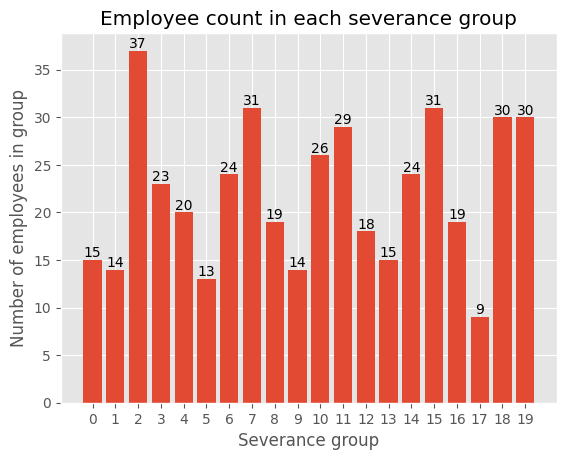

In [57]:
# Final grouping
# Make sure there's no NA
data['group_combined'] = data[category_cols].astype(str).agg('_'.join, axis=1)
assert not data.query(f'{category_name}_category_code < 0').shape[0]

data['severance_group'] = data['group_combined'].astype('category').cat.codes

severance_group_size = data.groupby('severance_group').size()

ax = plt.bar(severance_group_size.index, severance_group_size)
plt.xticks(severance_group_size.index)
plt.xlabel('Severance group')
plt.ylabel('Number of employees in group')
plt.title('Employee count in each severance group')
plt.bar_label(ax)

# Make sure there's enough employee in each category
min_employees = 5
assert (severance_group_size > min_employees).all()

In [58]:
# region Constraint 1: Min number to offer RCC: 40.
# This is based on the probability so no need to do anything here
# endregion

# region Constraint 2: Yearly saving from salary is > 3million
# we calculate the yearly rate from monthly rate. We can't use monthly income because
# that's what the employee receives, but we are actually interested in what the company
# has to pay out
data['YearlyRate'] = data['MonthlyRate'] * 12 * data['prob_take_rcc']
# endregion

# region Constraint 3: Leaving ppl are spread evenly across job roles.
data['JobRole'] = 'role_' + data['JobRole']
role_list = data['JobRole'].unique().tolist()
role_counts = data.groupby('JobRole').size()

# Transform to wide format
data = pd.concat(
    [
        data.drop(['JobRole'], axis=1),
        data[['JobRole', 'prob_take_rcc']].pivot(columns='JobRole', values='prob_take_rcc').fillna(0),
    ],
    axis=1,
)
# endregion

# region Constraint 4: >= 80% of the employees have to stay in each department
data['Department'] = 'dept_' + data['Department']
dept_list = data['Department'].unique().tolist()
dept_counts = data.groupby('Department').size()

# Transform to wide format
data = pd.concat(
    [
        data.drop(['Department'], axis=1),
        data[['Department', 'prob_take_rcc']].pivot(columns='Department', values='prob_take_rcc').fillna(0),
    ],
    axis=1,
)
# endregion

# endregion

# region Compute the statistics for each employee category
data['employee_count'] = 1
severance_group_stats = data.groupby('severance_group', as_index=False).agg({
    'prob_take_rcc': 'sum',  # constraint 1
    'YearlyRate': 'sum',  # constraint 2
    **{role: 'sum' for role in role_list},  # constraint 3
    **{dept: 'sum' for dept in dept_list},  # constraint 4
    'severance_package': 'sum',  # objective
    'employee_count': 'sum',  # total number of employees in each group
})

severance_group_stats.to_csv('./output/severance_groups.csv', index=False)
# endregion

In [59]:
# region Optimise
# region Setup
groups = severance_group_stats.copy()
model = LpProblem(name='test', sense=LpMinimize)

group_chosen = [LpVariable(name=f'severance_group{i}', cat='Binary') for i in groups['severance_group']]

severance_pays = groups['severance_package'].tolist()
total_employees_before = groups['employee_count'].sum()
# endregion

# region objective
objective = lpSum(
    [group * severance_package]
    for group, severance_package
    in zip(group_chosen, groups['severance_package'])
)

model += objective
# endregion

# region Constraint 1: Min number to offer RCC: 40.
employees_to_leave = lpSum([
    group * employee_count
    for group, employee_count
    in zip(group_chosen, groups['prob_take_rcc'])
])

employee_constraint = employees_to_leave >= 40

model += (employee_constraint, 'employee_to_offer_rcc')
# endregion

# region Constraint 2: Yearly saving from salary is >3 million
salary_constraint = lpSum([
    group * group_yearly_salary
    for group, group_yearly_salary
    in zip(group_chosen, groups['YearlyRate'])
]) >= 3_000_000

model += (salary_constraint, 'yearly_saving')
# endregion

# region Constraint 3: Leaving ppl are spread evenly across job roles.
tolerance = 0.1
roles = role_counts.index

total_employees_after = total_employees_before - employees_to_leave

for role in roles:
    # Number of employees in the current role before the RCC
    count_employee_in_role_before = role_counts[role]

    # Pct of employees from the current role before the RCC
    pct_in_role_before = count_employee_in_role_before / total_employees_before

    # Number of employees remaining in the current role after the RCC
    count_employee_in_role_after = count_employee_in_role_before - lpSum([
        group * count_employees_with_role_in_group
        for group, count_employees_with_role_in_group
        in zip(group_chosen, groups[role])
    ])

    # Target number of employees remaining in the current role after the RCC
    target_count_employee_in_role_after = pct_in_role_before * total_employees_after

    # Add constraint
    model += (
        count_employee_in_role_after >= (target_count_employee_in_role_after * (1 - tolerance)),
        f'min_remaining_{role}'
    )

    model += (
        count_employee_in_role_after <= (target_count_employee_in_role_after * (1 + tolerance)),
        f'max_remaining_{role}'
    )
# endregion

# region Constraint 4: >= 80% of the employees have to stay in each department
depts = dept_counts.index

for dept in depts:
    # Number of employees in the department before
    count_employee_in_department_before = dept_counts[dept]

    total_employee_in_dept_after = count_employee_in_department_before - lpSum([
        group * count_employees_in_department_in_group
        for group, count_employees_in_department_in_group
        in zip(group_chosen, groups[dept])
    ])

    model += (
        total_employee_in_dept_after >= (count_employee_in_department_before * 0.8),
        f'remaining_{dept}'
    )
# endregion

In [60]:
# show model
# print(model)

# Solve
status = model.solve()

# Get status
print('Solver status:', LpStatus[model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/dd056d99ea9149c089897a0da9962577-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/dd056d99ea9149c089897a0da9962577-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 28 COLUMNS
At line 541 RHS
At line 565 BOUNDS
At line 586 ENDATA
Problem MODEL has 23 rows, 20 columns and 452 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.48937e+06 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 11 rows, 20 columns (20 integer (20 of which binary)) and 220 elements
C

In [61]:
# region gather optimisation results
severance_group_results = []
for var in model.variables():
    severance_group_results.append({
        'severance_group': int(var.name.replace('severance_group', '')),
        'rcc_offer': var.value()
    })
severance_group_results_df = pd.DataFrame(severance_group_results)

groups_results = pd.merge(
    groups,
    severance_group_results_df,
    on='severance_group'
)

rcc_offer_groups = groups_results.query('rcc_offer == 1')

data.merge(
    severance_group_results_df,
    on='severance_group'
).to_csv('./output/severance_offer/complete_case_income_jobsatisfaction.csv', index=False)

# endregion

groups_results


severance_group  prob_take_rcc    YearlyRate  role_Sales Executive  role_Manufacturing Director  role_Human Resources  role_Research Scientist  role_Laboratory Technician  role_Sales Representative  role_Healthcare Representative  role_Manager  role_Research Director  dept_Sales  dept_Research & Development  dept_Human Resources  severance_package  employee_count  rcc_offer
0                 0       4.615515  9.662366e+05              0.000000                     0.000000              0.455081                 1.639690                    2.247093                   0.273651                        0.000000      0.000000                0.000000    0.273651                     3.886783              0.455081       1.428073e+05              15        1.0
1                 1       2.743256  3.849523e+05              0.000000                     0.000000              0.491483                 0.909254                    0.837887                   0.504632                        0.000000      0.000000                0.000000    0.504632                     1.747141              0.491483       1.293855e+05              14        1.0
2                 2       8.491160  1.448447e+06              0.000000                     0.000000              0.790738                 1.215889                    4.229426                   2.255107                        0.000000      0.000000                0.000000    2.255107                     5.445315              0.790738       3.640586e+05              37        1.0
3                 3       3.900481  6.988543e+05              0.000000                     0.000000              0.589520                 0.540576                    2.145737                   0.624648                        0.000000      0.000000                0.000000    0.624648                     2.686312              0.589520       2.009399e+05              23        0.0
4                 4       3.721207  5.208430e+05              0.723822                     0.461172              0.148193                 1.538763                    0.849257                   0.000000                        0.000000      0.000000                0.000000    0.723822                     2.849192              0.148193       3.528059e+05              20        1.0
5                 5       3.450887  6.565448e+05              0.000000                     0.000000              0.006019                 2.229705                    1.213409                   0.000000                        0.001754      0.000000                0.000000    0.000000                     3.444868              0.006019       2.275815e+05              13        0.0
6                 6       4.223968  6.905185e+05              0.200822                     0.005965              0.000000                 0.300684                    3.452614                   0.000000                        0.263882      0.000000                0.000000    0.200822                     4.023146              0.000000       4.334819e+05              24        1.0
7                 7       5.511279  1.139958e+06              1.338375                     0.000000              0.090926                 1.752378                    1.654972                   0.668826                        0.005802      0.000000                0.000000    2.007201                     3.413152              0.090926       5.412079e+05              31        0.0
8                 8       3.313745  6.627723e+05              2.040695                     0.470561              0.000000                 0.239326                    0.557253                   0.000000                        0.005910      0.000000                0.000000    2.040695                     1.273050              0.000000       4.725223e+05              19        1.0
9                 9       2.118609  3.321170e+05              1.163761                     0.508717              0.000000                 0.025129                    0.145707                   0

### Results

In [62]:
# region analyse optimisation results
# Objective: severance pay
severance_pay = rcc_offer_groups['severance_package'].sum() / 1000000
print(f'Severance pay: €{severance_pay:.2f} million')

# Constraint 1: Number of people to offer RCC
leavings = rcc_offer_groups['prob_take_rcc'].sum()
print(f'Number of employees leaving: {leavings:.2f}')

assert leavings >= 40

# Constraint 2: Yearly saving
yearly_saving = rcc_offer_groups['YearlyRate'].sum() / 1000000
print(f'Yearly saving: €{yearly_saving:.2f} million')

assert yearly_saving > 3

# Constraint 3: Leaving ppl are spread evenly across job roles
total_headcount_after = total_employees_before - leavings

role_changes = pd.concat(
    [
        role_counts / total_employees_before * 100,  # before
        (role_counts - rcc_offer_groups[roles].sum()) / total_headcount_after * 100,  # after
    ],
    axis=1
)
role_changes.columns = ['pct_before', 'pct_after']
role_changes = role_changes.eval('relative_change = (pct_after - pct_before) / pct_before * 100').reset_index()
role_changes['JobRole'] = role_changes['JobRole'].str.replace('role_', '')

print('\n')
print('----------- Role changes')
print(role_changes)

assert (role_changes['relative_change'].abs() <= tolerance * 100).all()

# Constraint 4: >= 80% of the employees have to stay in each department
dept_changes = pd.concat(
    [
        dept_counts,  # before
        dept_counts - rcc_offer_groups[depts].sum(),  # after
    ],
    axis=1,
)
dept_changes.columns = ['employee_count_before', 'employee_count_after']
dept_changes = dept_changes.eval('pct_remaining = employee_count_after / employee_count_before * 100').reset_index()
dept_changes['Department'] = dept_changes['Department'].str.replace('dept_', '')

print('\n')
print('----------- Department changes')
print(dept_changes)

assert (dept_changes['pct_remaining'].abs() >= 0.8).all()

# endregion

# analyse protected attributes
data_protected = pd.merge(
    data,
    severance_group_results_df,
    on='severance_group'
)

# Gender
_ = analyse_rcc_offer_rate(data_protected, 'Gender')

# Age
data_protected['age_group'] = pd.qcut(data_protected['Age'], 5)
_ = analyse_rcc_offer_rate(data_protected, 'age_group')

# Marital Status
_ = analyse_rcc_offer_rate(data_protected, 'MaritalStatus')


Severance pay: €4.81 million
Number of employees leaving: 40.04
Yearly saving: €6.97 million


----------- Role changes
                     JobRole  pct_before  pct_after  relative_change
0  Healthcare Representative    9.523810  10.220522         7.315482
1            Human Resources    4.081633   3.909776        -4.210498
2      Laboratory Technician   18.140590  16.653789        -8.195988
3                    Manager    6.575964   7.232670         9.986464
4     Manufacturing Director   11.337868  11.683808         3.051187
5          Research Director    4.081633   4.489243         9.986464
6         Research Scientist   17.687075  17.856125         0.955782
7            Sales Executive   24.716553  24.470761        -0.994445
8       Sales Representative    3.854875   3.483306        -9.638938


----------- Department changes
               Department  employee_count_before  employee_count_after  pct_remaining
0         Human Resources                     21             18.676575 

### Case 4: Monthly Income X Environment Satisfaction

### Optimise

In [63]:
data = data_raw.copy()

In [64]:
# By monthly income
category_name = 'MonthlyIncome'
n_buckets = 5
data[f'{category_name}_category'] = pd.qcut(data[category_name], n_buckets)
data[f'{category_name}_category_code'] = data[f'{category_name}_category'].cat.codes
data.groupby(f'{category_name}_category_code').size()


MonthlyIncome_category_code
0    89
1    88
2    88
3    88
4    88
dtype: int64

In [65]:
# By satisfaction
category_name = 'EnvironmentSatisfaction'
n_buckets = 3

data[f'{category_name}_category_code'] = data[category_name]
data.groupby(f'{category_name}_category_code').size()


EnvironmentSatisfaction_category_code
1     77
2     75
3    143
4    146
dtype: int64

In [66]:
category_cols = [col for col in data.columns if '_category_code' in col]
category_cols

['MonthlyIncome_category_code', 'EnvironmentSatisfaction_category_code']

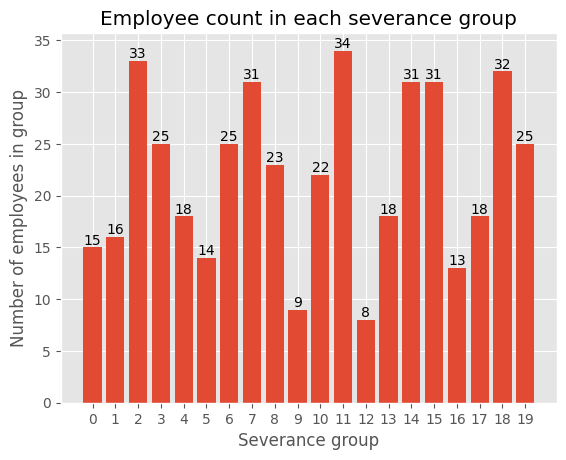

In [67]:
# Final grouping
# Make sure there's no NA
data['group_combined'] = data[category_cols].astype(str).agg('_'.join, axis=1)
assert not data.query(f'{category_name}_category_code < 0').shape[0]

data['severance_group'] = data['group_combined'].astype('category').cat.codes

severance_group_size = data.groupby('severance_group').size()

ax = plt.bar(severance_group_size.index, severance_group_size)
plt.xticks(severance_group_size.index)
plt.xlabel('Severance group')
plt.ylabel('Number of employees in group')
plt.title('Employee count in each severance group')
plt.bar_label(ax)

# Make sure there's enough employee in each category
min_employees = 5
assert (severance_group_size > min_employees).all()

In [68]:
# region Constraint 1: Min number to offer RCC: 40.
# This is based on the probability so no need to do anything here
# endregion

# region Constraint 2: Yearly saving from salary is > 3million
# we calculate the yearly rate from monthly rate. We can't use monthly income because
# that's what the employee receives, but we are actually interested in what the company
# has to pay out
data['YearlyRate'] = data['MonthlyRate'] * 12 * data['prob_take_rcc']
# endregion

# region Constraint 3: Leaving ppl are spread evenly across job roles.
data['JobRole'] = 'role_' + data['JobRole']
role_list = data['JobRole'].unique().tolist()
role_counts = data.groupby('JobRole').size()

# Transform to wide format
data = pd.concat(
    [
        data.drop(['JobRole'], axis=1),
        data[['JobRole', 'prob_take_rcc']].pivot(columns='JobRole', values='prob_take_rcc').fillna(0),
    ],
    axis=1,
)
# endregion

# region Constraint 4: >= 80% of the employees have to stay in each department
data['Department'] = 'dept_' + data['Department']
dept_list = data['Department'].unique().tolist()
dept_counts = data.groupby('Department').size()

# Transform to wide format
data = pd.concat(
    [
        data.drop(['Department'], axis=1),
        data[['Department', 'prob_take_rcc']].pivot(columns='Department', values='prob_take_rcc').fillna(0),
    ],
    axis=1,
)
# endregion

# endregion

# region Compute the statistics for each employee category
data['employee_count'] = 1
severance_group_stats = data.groupby('severance_group', as_index=False).agg({
    'prob_take_rcc': 'sum',  # constraint 1
    'YearlyRate': 'sum',  # constraint 2
    **{role: 'sum' for role in role_list},  # constraint 3
    **{dept: 'sum' for dept in dept_list},  # constraint 4
    'severance_package': 'sum',  # objective
    'employee_count': 'sum',  # total number of employees in each group
})

severance_group_stats.to_csv('./output/severance_groups.csv', index=False)
# endregion

In [69]:
# region Optimise
# region Setup
groups = severance_group_stats.copy()
model = LpProblem(name='test', sense=LpMinimize)

group_chosen = [LpVariable(name=f'severance_group{i}', cat='Binary') for i in groups['severance_group']]

severance_pays = groups['severance_package'].tolist()
total_employees_before = groups['employee_count'].sum()
# endregion

# region objective
objective = lpSum(
    [group * severance_package]
    for group, severance_package
    in zip(group_chosen, groups['severance_package'])
)

model += objective
# endregion

# region Constraint 1: Min number to offer RCC: 40.
employees_to_leave = lpSum([
    group * employee_count
    for group, employee_count
    in zip(group_chosen, groups['prob_take_rcc'])
])

employee_constraint = employees_to_leave >= 40

model += (employee_constraint, 'employee_to_offer_rcc')
# endregion

# region Constraint 2: Yearly saving from salary is >3 million
salary_constraint = lpSum([
    group * group_yearly_salary
    for group, group_yearly_salary
    in zip(group_chosen, groups['YearlyRate'])
]) >= 3_000_000

model += (salary_constraint, 'yearly_saving')
# endregion

# region Constraint 3: Leaving ppl are spread evenly across job roles.
tolerance = 0.1
roles = role_counts.index

total_employees_after = total_employees_before - employees_to_leave

for role in roles:
    # Number of employees in the current role before the RCC
    count_employee_in_role_before = role_counts[role]

    # Pct of employees from the current role before the RCC
    pct_in_role_before = count_employee_in_role_before / total_employees_before

    # Number of employees remaining in the current role after the RCC
    count_employee_in_role_after = count_employee_in_role_before - lpSum([
        group * count_employees_with_role_in_group
        for group, count_employees_with_role_in_group
        in zip(group_chosen, groups[role])
    ])

    # Target number of employees remaining in the current role after the RCC
    target_count_employee_in_role_after = pct_in_role_before * total_employees_after

    # Add constraint
    model += (
        count_employee_in_role_after >= (target_count_employee_in_role_after * (1 - tolerance)),
        f'min_remaining_{role}'
    )

    model += (
        count_employee_in_role_after <= (target_count_employee_in_role_after * (1 + tolerance)),
        f'max_remaining_{role}'
    )
# endregion

# region Constraint 4: >= 80% of the employees have to stay in each department
depts = dept_counts.index

for dept in depts:
    # Number of employees in the department before
    count_employee_in_department_before = dept_counts[dept]

    total_employee_in_dept_after = count_employee_in_department_before - lpSum([
        group * count_employees_in_department_in_group
        for group, count_employees_in_department_in_group
        in zip(group_chosen, groups[dept])
    ])

    model += (
        total_employee_in_dept_after >= (count_employee_in_department_before * 0.8),
        f'remaining_{dept}'
    )
# endregion

In [70]:
# show model
# print(model)

# Solve
status = model.solve()

# Get status
print('Solver status:', LpStatus[model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/965f880cb08f48c6b081d5a87d057712-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/965f880cb08f48c6b081d5a87d057712-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 28 COLUMNS
At line 544 RHS
At line 568 BOUNDS
At line 589 ENDATA
Problem MODEL has 23 rows, 20 columns and 455 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.59109e+06 - 0.00 seconds
Cgl0004I processed model has 10 rows, 20 columns (20 integer (20 of which binary)) and 200 elements
Cbc0038I Initial state - 3 integers unsatisfied sum - 1.1133
Cbc0038I Pass   1: suminf.    0.39548 (2) obj. 3.72529e+06 iterations 5
Cbc0038I Pass   2:

In [71]:
# region gather optimisation results
severance_group_results = []
for var in model.variables():
    severance_group_results.append({
        'severance_group': int(var.name.replace('severance_group', '')),
        'rcc_offer': var.value()
    })
severance_group_results_df = pd.DataFrame(severance_group_results)

groups_results = pd.merge(
    groups,
    severance_group_results_df,
    on='severance_group'
)

rcc_offer_groups = groups_results.query('rcc_offer == 1')

data.merge(
    severance_group_results_df,
    on='severance_group'
).to_csv('./output/severance_offer/complete_case_income_envsatisfaction.csv', index=False)

# endregion

groups_results


severance_group  prob_take_rcc    YearlyRate  role_Sales Executive  role_Manufacturing Director  role_Human Resources  role_Research Scientist  role_Laboratory Technician  role_Sales Representative  role_Healthcare Representative  role_Manager  role_Research Director  dept_Sales  dept_Research & Development  dept_Human Resources  severance_package  employee_count  rcc_offer
0                 0       4.332848  8.843476e+05              0.000000                     0.000000              0.589520                 1.585929                    2.157399                   0.000000                        0.000000      0.000000                0.000000    0.000000                     3.743328              0.589520       1.383870e+05              15        1.0
1                 1       3.010279  4.369411e+05              0.000000                     0.000000              0.614257                 0.635392                    0.971445                   0.789185                        0.000000      0.000000                0.000000    0.789185                     1.606838              0.614257       1.569396e+05              16        0.0
2                 2       5.906137  1.075717e+06              0.000000                     0.000000              0.815189                 1.068591                    2.280350                   1.742007                        0.000000      0.000000                0.000000    1.742007                     3.348941              0.815189       3.116522e+05              33        1.0
3                 3       6.501148  1.101485e+06              0.000000                     0.000000              0.307856                 1.015497                    4.050949                   1.126846                        0.000000      0.000000                0.000000    1.126846                     5.066445              0.307856       2.302125e+05              25        1.0
4                 4       4.617441  6.704819e+05              0.008859                     0.000000              0.000000                 2.510361                    2.098221                   0.000000                        0.000000      0.000000                0.000000    0.008859                     4.608582              0.000000       3.195672e+05              18        1.0
5                 5       1.767961  3.454607e+05              0.210412                     0.007316              0.090926                 0.343429                    1.052433                   0.000000                        0.063445      0.000000                0.000000    0.210412                     1.466623              0.090926       2.850666e+05              14        0.0
6                 6       5.511032  1.040794e+06              1.497727                     0.450825              0.006019                 1.725096                    1.829611                   0.000000                        0.001754      0.000000                0.000000    1.497727                     4.007286              0.006019       4.345719e+05              25        1.0
7                 7       5.010906  9.511277e+05              0.546020                     0.008995              0.148193                 1.242644                    2.189987                   0.668826                        0.206240      0.000000                0.000000    1.214847                     3.647867              0.148193       5.158716e+05              31        0.0
8                 8       4.731920  1.095696e+06              3.230822                     0.506084              0.071488                 0.008189                    0.778862                   0.000000                        0.136476      0.000000                0.000000    3.230822                     1.429610              0.071488       5.794104e+05              23        1.0
9                 9       0.932805  1.834174e+05              0.028541                     0.514173              0.000000                 0.113661                    0.139387                   0

### Results

In [72]:
# region analyse optimisation results
# Objective: severance pay
severance_pay = rcc_offer_groups['severance_package'].sum() / 1000000
print(f'Severance pay: €{severance_pay:.2f} million')

# Constraint 1: Number of people to offer RCC
leavings = rcc_offer_groups['prob_take_rcc'].sum()
print(f'Number of employees leaving: {leavings:.2f}')

assert leavings >= 40

# Constraint 2: Yearly saving
yearly_saving = rcc_offer_groups['YearlyRate'].sum() / 1000000
print(f'Yearly saving: €{yearly_saving:.2f} million')

assert yearly_saving > 3

# Constraint 3: Leaving ppl are spread evenly across job roles
total_headcount_after = total_employees_before - leavings

role_changes = pd.concat(
    [
        role_counts / total_employees_before * 100,  # before
        (role_counts - rcc_offer_groups[roles].sum()) / total_headcount_after * 100,  # after
    ],
    axis=1
)
role_changes.columns = ['pct_before', 'pct_after']
role_changes = role_changes.eval('relative_change = (pct_after - pct_before) / pct_before * 100').reset_index()
role_changes['JobRole'] = role_changes['JobRole'].str.replace('role_', '')

print('\n')
print('----------- Role changes')
print(role_changes)

assert (role_changes['relative_change'].abs() <= tolerance * 100).all()

# Constraint 4: >= 80% of the employees have to stay in each department
dept_changes = pd.concat(
    [
        dept_counts,  # before
        dept_counts - rcc_offer_groups[depts].sum(),  # after
    ],
    axis=1,
)
dept_changes.columns = ['employee_count_before', 'employee_count_after']
dept_changes = dept_changes.eval('pct_remaining = employee_count_after / employee_count_before * 100').reset_index()
dept_changes['Department'] = dept_changes['Department'].str.replace('dept_', '')

print('\n')
print('----------- Department changes')
print(dept_changes)

assert (dept_changes['pct_remaining'].abs() >= 0.8).all()

# endregion

# analyse protected attributes
data_protected = pd.merge(
    data,
    severance_group_results_df,
    on='severance_group'
)

# Gender
_ = analyse_rcc_offer_rate(data_protected, 'Gender')

# Age
data_protected['age_group'] = pd.qcut(data_protected['Age'], 5)
_ = analyse_rcc_offer_rate(data_protected, 'age_group')

# Marital Status
_ = analyse_rcc_offer_rate(data_protected, 'MaritalStatus')


Severance pay: €4.23 million
Number of employees leaving: 40.07
Yearly saving: €7.48 million


----------- Role changes
                     JobRole  pct_before  pct_after  relative_change
0  Healthcare Representative    9.523810  10.368280         8.866940
1            Human Resources    4.081633   3.977844        -2.542817
2      Laboratory Technician   18.140590  16.565658        -8.681811
3                    Manager    6.575964   7.233161         9.993926
4     Manufacturing Director   11.337868  11.959396         5.481870
5          Research Director    4.081633   4.489548         9.993926
6         Research Scientist   17.687075  17.396087        -1.645200
7            Sales Executive   24.716553  24.485445        -0.935033
8       Sales Representative    3.854875   3.524581        -8.568217


----------- Department changes
               Department  employee_count_before  employee_count_after  pct_remaining
0         Human Resources                     21             18.948420 

### Case 5: Severance pay

### Optimise

In [73]:
data = data_raw.copy()

In [74]:
# By monthly income
category_name = 'severance_package'
n_buckets = 40
data[f'{category_name}_category'] = pd.qcut(data[category_name], n_buckets)
data[f'{category_name}_category_code'] = data[f'{category_name}_category'].cat.codes
data.groupby(f'{category_name}_category_code').size()


severance_package_category_code
0     12
1     11
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
17    11
18    11
19    11
20    11
21    11
22    11
23    11
24    11
25    11
26    11
27    11
28    11
29    11
30    11
31    11
32    11
33    11
34    11
35    11
36    11
37    11
38    11
39    11
dtype: int64

In [75]:
category_cols = [col for col in data.columns if '_category_code' in col]
category_cols

['severance_package_category_code']

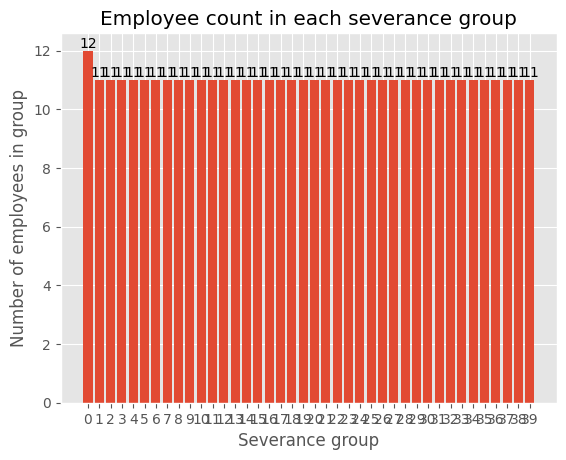

In [76]:
# Final grouping
# Make sure there's no NA
data['group_combined'] = data[category_cols].astype(str).agg('_'.join, axis=1)
assert not data.query(f'{category_name}_category_code < 0').shape[0]

data['severance_group'] = data['group_combined'].astype('category').cat.codes

severance_group_size = data.groupby('severance_group').size()

ax = plt.bar(severance_group_size.index, severance_group_size)
plt.xticks(severance_group_size.index)
plt.xlabel('Severance group')
plt.ylabel('Number of employees in group')
plt.title('Employee count in each severance group')
plt.bar_label(ax)

# Make sure there's enough employee in each category
min_employees = 5
assert (severance_group_size > min_employees).all()

In [77]:
# region Constraint 1: Min number to offer RCC: 40.
# This is based on the probability so no need to do anything here
# endregion

# region Constraint 2: Yearly saving from salary is > 3million
# we calculate the yearly rate from monthly rate. We can't use monthly income because
# that's what the employee receives, but we are actually interested in what the company
# has to pay out
data['YearlyRate'] = data['MonthlyRate'] * 12 * data['prob_take_rcc']
# endregion

# region Constraint 3: Leaving ppl are spread evenly across job roles.
data['JobRole'] = 'role_' + data['JobRole']
role_list = data['JobRole'].unique().tolist()
role_counts = data.groupby('JobRole').size()

# Transform to wide format
data = pd.concat(
    [
        data.drop(['JobRole'], axis=1),
        data[['JobRole', 'prob_take_rcc']].pivot(columns='JobRole', values='prob_take_rcc').fillna(0),
    ],
    axis=1,
)
# endregion

# region Constraint 4: >= 80% of the employees have to stay in each department
data['Department'] = 'dept_' + data['Department']
dept_list = data['Department'].unique().tolist()
dept_counts = data.groupby('Department').size()

# Transform to wide format
data = pd.concat(
    [
        data.drop(['Department'], axis=1),
        data[['Department', 'prob_take_rcc']].pivot(columns='Department', values='prob_take_rcc').fillna(0),
    ],
    axis=1,
)
# endregion

# endregion

# region Compute the statistics for each employee category
data['employee_count'] = 1
severance_group_stats = data.groupby('severance_group', as_index=False).agg({
    'prob_take_rcc': 'sum',  # constraint 1
    'YearlyRate': 'sum',  # constraint 2
    **{role: 'sum' for role in role_list},  # constraint 3
    **{dept: 'sum' for dept in dept_list},  # constraint 4
    'severance_package': 'sum',  # objective
    'employee_count': 'sum',  # total number of employees in each group
})

severance_group_stats.to_csv('./output/severance_groups.csv', index=False)
# endregion

In [78]:
# region Optimise
# region Setup
groups = severance_group_stats.copy()
model = LpProblem(name='test', sense=LpMinimize)

group_chosen = [LpVariable(name=f'severance_group{i}', cat='Binary') for i in groups['severance_group']]

severance_pays = groups['severance_package'].tolist()
total_employees_before = groups['employee_count'].sum()
# endregion

# region objective
objective = lpSum(
    [group * severance_package]
    for group, severance_package
    in zip(group_chosen, groups['severance_package'])
)

model += objective
# endregion

# region Constraint 1: Min number to offer RCC: 40.
employees_to_leave = lpSum([
    group * employee_count
    for group, employee_count
    in zip(group_chosen, groups['prob_take_rcc'])
])

employee_constraint = employees_to_leave >= 40

model += (employee_constraint, 'employee_to_offer_rcc')
# endregion

# region Constraint 2: Yearly saving from salary is >3 million
salary_constraint = lpSum([
    group * group_yearly_salary
    for group, group_yearly_salary
    in zip(group_chosen, groups['YearlyRate'])
]) >= 3_000_000

model += (salary_constraint, 'yearly_saving')
# endregion

# region Constraint 3: Leaving ppl are spread evenly across job roles.
tolerance = 0.1
roles = role_counts.index

total_employees_after = total_employees_before - employees_to_leave

for role in roles:
    # Number of employees in the current role before the RCC
    count_employee_in_role_before = role_counts[role]

    # Pct of employees from the current role before the RCC
    pct_in_role_before = count_employee_in_role_before / total_employees_before

    # Number of employees remaining in the current role after the RCC
    count_employee_in_role_after = count_employee_in_role_before - lpSum([
        group * count_employees_with_role_in_group
        for group, count_employees_with_role_in_group
        in zip(group_chosen, groups[role])
    ])

    # Target number of employees remaining in the current role after the RCC
    target_count_employee_in_role_after = pct_in_role_before * total_employees_after

    # Add constraint
    model += (
        count_employee_in_role_after >= (target_count_employee_in_role_after * (1 - tolerance)),
        f'min_remaining_{role}'
    )

    model += (
        count_employee_in_role_after <= (target_count_employee_in_role_after * (1 + tolerance)),
        f'max_remaining_{role}'
    )
# endregion

# region Constraint 4: >= 80% of the employees have to stay in each department
depts = dept_counts.index

for dept in depts:
    # Number of employees in the department before
    count_employee_in_department_before = dept_counts[dept]

    total_employee_in_dept_after = count_employee_in_department_before - lpSum([
        group * count_employees_in_department_in_group
        for group, count_employees_in_department_in_group
        in zip(group_chosen, groups[dept])
    ])

    model += (
        total_employee_in_dept_after >= (count_employee_in_department_before * 0.8),
        f'remaining_{dept}'
    )
# endregion

In [79]:
# show model
# print(model)

# Solve
status = model.solve()

# Get status
print('Solver status:', LpStatus[model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/b2232f2413934c2c9c1ebfb63627529e-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/b2232f2413934c2c9c1ebfb63627529e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 28 COLUMNS
At line 1045 RHS
At line 1069 BOUNDS
At line 1110 ENDATA
Problem MODEL has 23 rows, 40 columns and 896 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2.7791e+06 - 0.00 seconds
Cgl0004I processed model has 12 rows, 40 columns (40 integer (40 of which binary)) and 480 elements
Cbc0038I Initial state - 3 integers unsatisfied sum - 0.693886
Cbc0038I Pass   1: suminf.    0.49504 (2) obj. 3.08443e+06 iterations 3
Cbc0038I Pass 

In [80]:
# region gather optimisation results
severance_group_results = []
for var in model.variables():
    severance_group_results.append({
        'severance_group': int(var.name.replace('severance_group', '')),
        'rcc_offer': var.value()
    })
severance_group_results_df = pd.DataFrame(severance_group_results)

groups_results = pd.merge(
    groups,
    severance_group_results_df,
    on='severance_group'
)

rcc_offer_groups = groups_results.query('rcc_offer == 1')

data.merge(
    severance_group_results_df,
    on='severance_group'
).to_csv('./output/severance_offer/complete_case_severance_pay.csv', index=False)

# endregion

groups_results


severance_group  prob_take_rcc     YearlyRate  role_Sales Executive  role_Manufacturing Director  role_Human Resources  role_Research Scientist  role_Laboratory Technician  role_Sales Representative  role_Healthcare Representative  role_Manager  role_Research Director  dept_Sales  dept_Research & Development  dept_Human Resources  severance_package  employee_count  rcc_offer
0                 0       3.083623  555228.806492              0.000000                     0.000000              0.307856                 1.054221                    1.721545                   0.000000                        0.000000      0.000000                0.000000    0.000000                     2.775767              0.307856       5.957725e+04              12        1.0
1                 1       2.235005  373591.582290              0.000000                     0.000000              0.079836                 0.564092                    1.317425                   0.273651                        0.000000      0.000000                0.000000    0.273651                     1.881518              0.079836       8.158050e+04              11        1.0
2                 2       2.245504  406773.738893              0.795668                     0.000000              0.000000                 0.286833                    1.163004                   0.000000                        0.000000      0.000000                0.000000    0.795668                     1.449836              0.000000       1.609392e+05              11        1.0
3                 3       1.858234  258754.414225              0.269762                     0.015924              0.148193                 0.353162                    0.934716                   0.000000                        0.136476      0.000000                0.000000    0.269762                     1.440278              0.148193       1.733020e+05              11        1.0
4                 4       2.372642  291579.068944              1.099667                     0.005910              0.000000                 0.621477                    0.645588                   0.000000                        0.000000      0.000000                0.000000    1.099667                     1.272975              0.000000       1.841592e+05              11        1.0
5                 5       1.393388  203317.664812              0.202920                     0.266187              0.000000                 0.059992                    0.858378                   0.000000                        0.005910      0.000000                0.000000    0.202920                     1.190468              0.000000       1.954115e+05              11        1.0
6                 6       2.654656  472021.286591              0.681657                     0.959805              0.000000                 0.937124                    0.000000                   0.000000                        0.076069      0.000000                0.000000    0.681657                     1.972999              0.000000       2.063698e+05              11        1.0
7                 7       1.406341  266164.928990              0.817657                     0.000000              0.000000                 0.440831                    0.142050                   0.000000                        0.005802      0.000000                0.000000    0.817657                     0.588684              0.000000       2.186418e+05              11        0.0
8                 8       0.798585  184095.098079              0.184438                     0.200576              0.029332                 0.162034                    0.222205                   0.000000                        0.000000      0.000000                0.000000    0.184438                     0.584815              0.029332       2.296815e+05              11        0.0
9                 9       1.494841  115517.262822              1.142210                     0.019060              0.090926                 0.128726                    0.112165         

### Results

In [81]:
# region analyse optimisation results
# Objective: severance pay
severance_pay = rcc_offer_groups['severance_package'].sum() / 1000000
print(f'Severance pay: €{severance_pay:.2f} million')

# Constraint 1: Number of people to offer RCC
leavings = rcc_offer_groups['prob_take_rcc'].sum()
print(f'Number of employees leaving: {leavings:.2f}')

assert leavings >= 40

# Constraint 2: Yearly saving
yearly_saving = rcc_offer_groups['YearlyRate'].sum() / 1000000
print(f'Yearly saving: €{yearly_saving:.2f} million')

assert yearly_saving > 3

# Constraint 3: Leaving ppl are spread evenly across job roles
total_headcount_after = total_employees_before - leavings

role_changes = pd.concat(
    [
        role_counts / total_employees_before * 100,  # before
        (role_counts - rcc_offer_groups[roles].sum()) / total_headcount_after * 100,  # after
    ],
    axis=1
)
role_changes.columns = ['pct_before', 'pct_after']
role_changes = role_changes.eval('relative_change = (pct_after - pct_before) / pct_before * 100').reset_index()
role_changes['JobRole'] = role_changes['JobRole'].str.replace('role_', '')

print('\n')
print('----------- Role changes')
print(role_changes)

assert (role_changes['relative_change'].abs() <= tolerance * 100).all()

# Constraint 4: >= 80% of the employees have to stay in each department
dept_changes = pd.concat(
    [
        dept_counts,  # before
        dept_counts - rcc_offer_groups[depts].sum(),  # after
    ],
    axis=1,
)
dept_changes.columns = ['employee_count_before', 'employee_count_after']
dept_changes = dept_changes.eval('pct_remaining = employee_count_after / employee_count_before * 100').reset_index()
dept_changes['Department'] = dept_changes['Department'].str.replace('dept_', '')

print('\n')
print('----------- Department changes')
print(dept_changes)

assert (dept_changes['pct_remaining'].abs() >= 0.8).all()

# endregion

# analyse protected attributes
data_protected = pd.merge(
    data,
    severance_group_results_df,
    on='severance_group'
)

# Gender
_ = analyse_rcc_offer_rate(data_protected, 'Gender')

# Age
data_protected['age_group'] = pd.qcut(data_protected['Age'], 5)
_ = analyse_rcc_offer_rate(data_protected, 'age_group')

# Marital Status
_ = analyse_rcc_offer_rate(data_protected, 'MaritalStatus')


Severance pay: €3.08 million
Number of employees leaving: 40.01
Yearly saving: €7.08 million


----------- Role changes
                     JobRole  pct_before  pct_after  relative_change
0  Healthcare Representative    9.523810  10.274621         7.883524
1            Human Resources    4.081633   3.979366        -2.505524
2      Laboratory Technician   18.140590  16.336197        -9.946713
3                    Manager    6.575964   7.232154         9.978623
4     Manufacturing Director   11.337868  11.998746         5.828943
5          Research Director    4.081633   4.488923         9.978623
6         Research Scientist   17.687075  17.056833        -3.563288
7            Sales Executive   24.716553  25.112625         1.602455
8       Sales Representative    3.854875   3.520533        -8.673245


----------- Department changes
               Department  employee_count_before  employee_count_after  pct_remaining
0         Human Resources                     21             18.956743 